In [42]:
!wget https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg

--2021-11-03 14:35:45--  https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg
Resolving ribsandburgers.com (ribsandburgers.com)... 103.242.49.242
Connecting to ribsandburgers.com (ribsandburgers.com)|103.242.49.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58178 (57K) [image/jpeg]
Saving to: ‘2-angus-bacon-and-cheese.jpg.1’

2-angus-bacon-and-c 100%[===================>]  56.81K   311KB/s    in 0.2s    

2021-11-03 14:35:46 (311 KB/s) - ‘2-angus-bacon-and-cheese.jpg.1’ saved [58178/58178]



In [43]:
gambar = '/content/2-angus-bacon-and-cheese.jpg'

In [44]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [45]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [46]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": gambar
}

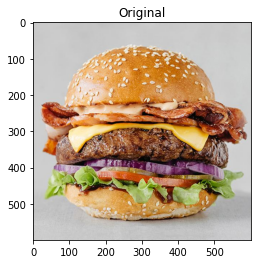

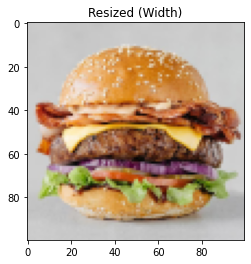

In [47]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 100 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 100.0 / image.shape[1]
dim = (100, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

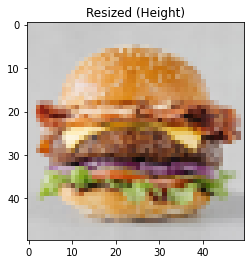

In [48]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

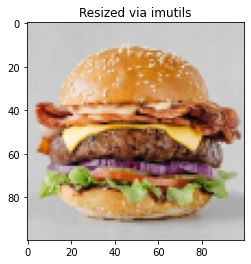

In [49]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


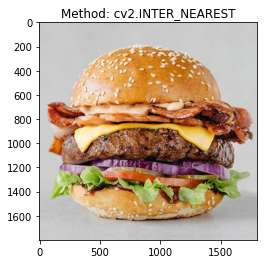

[INFO] cv2.INTER_LINEAR


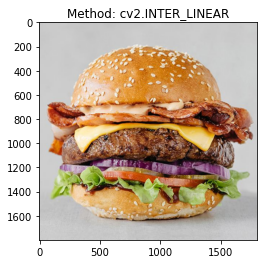

[INFO] cv2.INTER_AREA


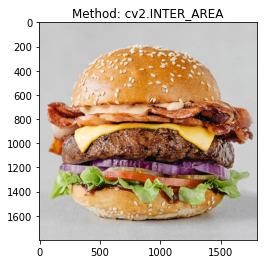

[INFO] cv2.INTER_CUBIC


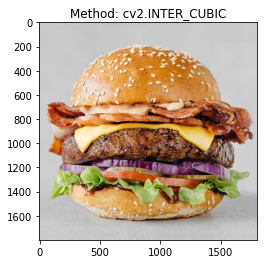

[INFO] cv2.INTER_LANCZOS4


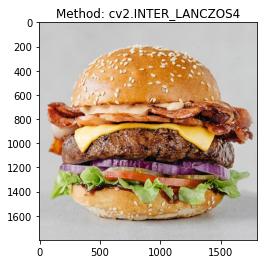

In [50]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)